# Imports

In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor



# Helping functions

In [86]:
def model_hendling(modelname, params, X_train, X_test, y_train, y_test):

    best_mae = np.inf
    best_params = {}
    best_model = None
    best_preds = None
    if modelname == "KNN":
        for n in params["n_neighbours"]:
            for w in params["weights"]:
                model = KNeighborsRegressor(n_neighbors=n, weights=w)
                model.fit(X_train, y_train)
                preds = model.predict(X_test)
                mae = mean_absolute_error(y_test, preds)
                if mae < best_mae:
                    best_mae = mae
                    best_params = {'n_neighbors': n, 'weights': w}
                    best_model = model
                    best_preds = preds
    elif modelname == "DTR":
        for d in params["max_depth"]:
            for s in params["min_samples_split"]:
                model = DecisionTreeRegressor(criterion="absolute_error", max_depth=d, min_samples_split=s)
                model.fit(X_train, y_train)
                preds = model.predict(X_test)
                mae = mean_absolute_error(y_test, preds)
                if mae < best_mae:
                    best_mae = mae
                    best_params = {'max_depth': d, 'min_samples_split': s}
                    best_model = model
                    best_preds = preds

    elif modelname == "RFR":
        for n in params["n_estimators"]:
            for d in params["max_depth"]:
                for s in params["min_samples_split"]:
                    model = RandomForestRegressor(criterion="absolute_error", n_estimators=n, max_depth=d, min_samples_split=s)
                    model.fit(X_train, y_train)
                    preds = model.predict(X_test)
                    mae = mean_absolute_error(y_test, preds)
                    if mae < best_mae:
                        best_mae = mae
                        best_params = {'n_estimators': n, 'max_depth': d, 'min_samples_split': s}
                        best_model = model
                        best_preds = preds

    elif modelname == "SVR":
        for c in params["C"]:
            for k in params["kernel"]:
                model = SVR(C=c, kernel=k)
                model.fit(X_train, y_train)
                preds = model.predict(X_test)
                mae = mean_absolute_error(y_test, preds)
                if mae < best_mae:
                    best_mae = mae
                    best_params = {'C': c, 'kernel': k}
                    best_model = model
                    best_preds = preds

    elif modelname == "GBR":
        for n in params["n_estimators"]:
            for l in params["learning_rate"]:
                model = GradientBoostingRegressor(n_estimators=n, learning_rate=l)
                model.fit(X_train, y_train)
                preds = model.predict(X_test)
                mae = mean_absolute_error(y_test, preds)
                if mae < best_mae:
                    best_mae = mae
                    best_params = {'n_estimators': n, 'learning_rate': l}
                    best_model = model
                    best_preds = preds
                    
    else:
        print("Not able to recognize modelname")

    print(modelname) 
    print(f"Best MAE score: {best_mae}")
    print(f"Best params: {best_params}")
    return best_model, best_preds

# Data

In [78]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Eda & Data preprocessing

In [79]:
"""No nan values, it's good, Almost all columns are numerical, except for the date column, which is a string."""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [80]:
"""Nothing special to say about the data, it's clean and ready to be used."""
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [81]:
# Delete the date column since it's not useful for the model, also delte instant column
df = df.drop(['dteday', 'instant'], axis=1)

multitarget = ['casual', 'registered']
target = 'cnt'
features = df.columns.drop([target, 'casual', 'registered'])

"""The target variable is the sum of the casual and registered users, so we can't use them as features,
we will use the other columns as features."""

X = df[features]
y = df[target]
y_multitarget = df[multitarget]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_multitarget, X_test_multitarget, y_train_multitarget, y_test_multitarget = train_test_split(X, y_multitarget, test_size=0.15, random_state=42)

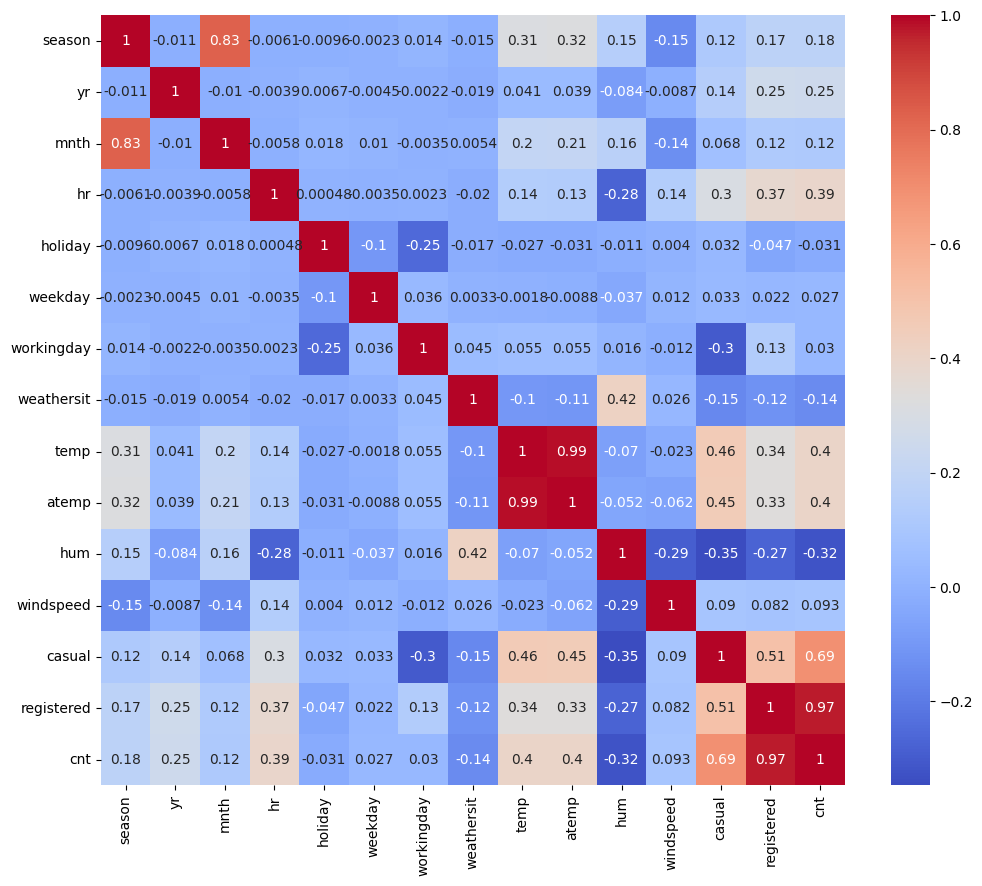

In [82]:
"""We can not see strong correlation between the target variable and the features, but we can see that seasons and mnths are
correlated, who would have thought that the month is correlated with the season? :)
Same for temp and atemp."""
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# KNN Regressor

In [83]:
KNN_reg_params = {"n_neighbours": np.arange(3, 22, 2), "weights": ['uniform', 'distance']}

best_knn_reg_model, best_knn_reg_preds = model_hendling("KNN", KNN_reg_params, X_train, X_test, y_train, y_test)


KNN
Best MAE score: 31.256765503461963
Best params: {'n_neighbors': np.int64(5), 'weights': 'distance'}


# Desicion tree regressor

In [84]:
DTR_params = {"max_depth": np.arange(3, 22, 2), "min_samples_split": np.arange(2, 22, 2)}

best_dtr_model, best_dtr_preds = model_hendling("DTR", DTR_params, X_train, X_test, y_train, y_test)

DTR
Best MAE score: 31.213271960107402
Best params: {'max_depth': np.int64(21), 'splitter': np.int64(16)}


# Random forest

In [87]:
# For faster grid search I will use only one value for max_depth and min_samples_split from best decision tree model above
RFR_params = {"n_estimators": [11, 15, 25], "max_depth": [21], "min_samples_split": [16]}

best_rfr_model, best_rfr_preds = model_hendling("RFR", RFR_params, X_train, X_test, y_train, y_test)

RFR
Best MAE score: 26.634261603375524
Best params: {'n_estimators': 25, 'max_depth': 21, 'min_samples_split': 16}


# SVM Regressor

In [88]:
SVR_params = {"C": [0.1, 1, 10, 100], "kernel": ['linear', 'poly', 'rbf']}

best_svr_model, best_svr_preds = model_hendling("SVR", SVR_params, X_train, X_test, y_train, y_test)

SVR
Best MAE score: 72.27415686005745
Best params: {'C': 100, 'kernel': 'rbf'}


# Boosting regressor

In [89]:
GBR_params = {"n_estimators": np.arange(10, 51, 5), "learning_rate": [0.01, 0.1, 1]}

best_gbr_model, best_gbr_preds = model_hendling("GBR", GBR_params, X_train, X_test, y_train, y_test)

GBR
Best MAE score: 38.849214980906645
Best params: {'n_estimators': np.int64(50), 'learning_rate': 1}


RFR got best MAE, but trained very slowly

# Training RFR on first year and validating on second

In [97]:
# Split the data into two years

X_train_year = X[df['yr'] == 0]
y_train_year = y[df['yr'] == 0]
y_train_multitarget_year = y_multitarget[df['yr'] == 0]

X_validate_year = X[df['yr'] == 1]
y_validate_year = y[df['yr'] == 1]
y_validate_multitarget_year = y_multitarget[df['yr'] == 1]

In [95]:
"""Model showed much worse results with this data split, i think it is because of lower number of samples in the train set.
Also, there could be some changes in bike rents in different years"""

rfr_year_model = RandomForestRegressor(criterion="absolute_error", n_estimators=25, max_depth=21, min_samples_split=16)
rfr_year_model.fit(X_train_year, y_train_year)
rfr_year_preds = rfr_year_model.predict(X_validate_year)
rfr_year_mae = mean_absolute_error(y_validate_year, rfr_year_preds)
print(f"MAE score for the best model on the year validation set: {rfr_year_mae}")

MAE score for the best model on the year validation set: 89.6879803068468


In [99]:
"""Slightly worse results than the previous model, but I expected worse results because of the multitarget variable 
due to accumulating error."""

rfr_year_multitarget_model = RandomForestRegressor(criterion="absolute_error", n_estimators=25, max_depth=21, min_samples_split=16)
rfr_year_multitarget_model.fit(X_train_year, y_train_multitarget_year)
rfr_year_multitarget_preds = rfr_year_multitarget_model.predict(X_validate_year)
rfr_year_multitarget_mae = mean_absolute_error(y_validate_year, rfr_year_multitarget_preds.sum(axis=1))
print(f"MAE score for the best model on the year validation set with multitarget: {rfr_year_multitarget_mae}")



MAE score for the best model on the year validation set with multitarget: 89.92494160751087


# Features research

Feature ranking:
1. feature hr (0.5893976293923814)
2. feature temp (0.10058030795904022)
3. feature workingday (0.0723259712153765)
4. feature yr (0.06634700723466061)
5. feature atemp (0.0346316665121222)
6. feature hum (0.031168361592259608)
7. feature mnth (0.02734479918238818)
8. feature weekday (0.02229921581054844)
9. feature season (0.02143156904353304)
10. feature weathersit (0.019612789740962682)
11. feature windspeed (0.011888941220138085)
12. feature holiday (0.0029717410965892106)


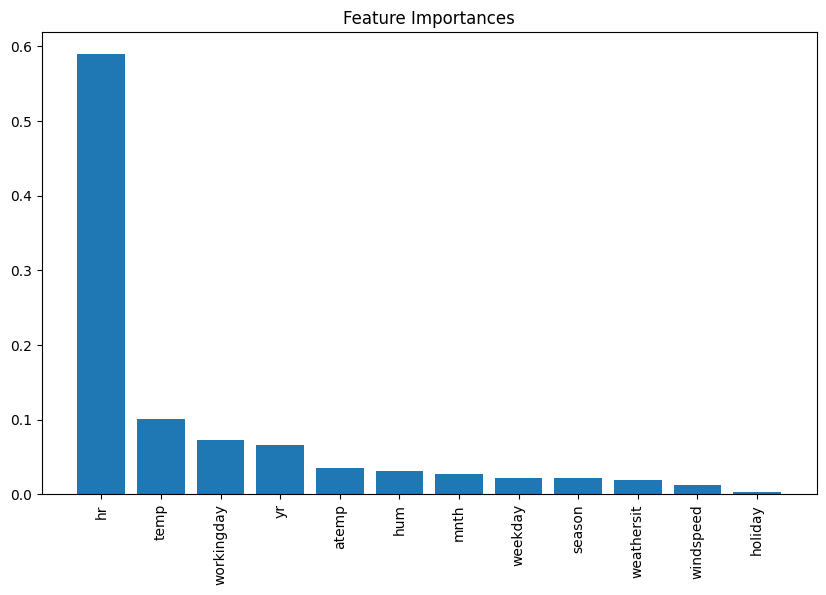

In [100]:
"""At the text and plot outputs of this cell we can observe feature imortances.
The most important is hr, and 2 considerably important features are temp and workingday.
Also we can see, that hour are much more important than season or any other feature.
Temp also is more important than atemp, which is logical, because temp is the real temperature 
that influences other weather components, and atemp is the feels like temperature."""

importances = best_rfr_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i in range(X.shape[1]):
    print(f"{i + 1}. feature {X.columns[indices[i]]} ({importances[indices[i]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

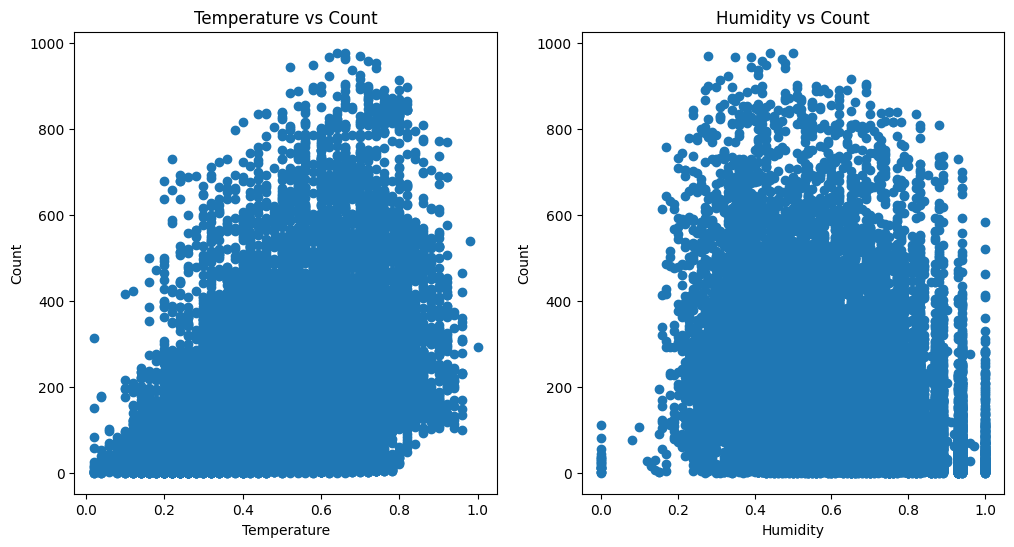

In [101]:
"""We can observe that there are no strong correlations between the target variable and the temp and hum, but we can see that
when temp is 0.5-0.7(after denormalizing 20.5-28.8) and humidity is 0.3-0.5(after denormalizing 30-50) the count is the highest."""

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['temp'], df['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs Count')

plt.subplot(1, 2, 2)
plt.scatter(df['hum'], df['cnt'])
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Humidity vs Count')
plt.show()